In [160]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
# from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn import datasets
from collections import OrderedDict 
import itertools

## Pull Data

In [176]:
digits = datasets.load_digits(n_class=10)
X = digits.data#[0:500,:]
y = digits.target#[0:500]
n_samples, n_features = X.shape

In [177]:
X.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

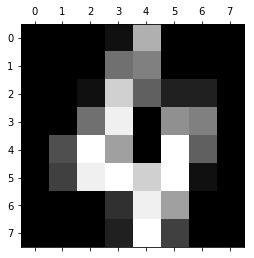

In [178]:
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show() 

In [179]:
# # Visualize the clustering
# def plot_clustering(X_red, labels, title=None):
#     x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
#     X_red = (X_red - x_min) / (x_max - x_min)

#     plt.figure(figsize=(6, 4))
#     for i in range(X_red.shape[0]):
#         plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
#                  color=plt.cm.nipy_spectral(labels[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     plt.xticks([])
#     plt.yticks([])
#     if title is not None:
#         plt.title(title, size=17)
#     plt.axis('off')
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plot_clustering(X_red = , labels, title=None)

## Coding up Hierarchical Clustering

In [180]:
def hClust(X):
    n, m = X.shape
    pairWiseDistMat = sklearn.metrics.pairwise.euclidean_distances(X)
    clusteringMat = np.zeros(shape = [n-1, 4])
    for i in range(2, n):#reversed(range(2, n)):
        
    return(0)

IndentationError: expected an indented block (<ipython-input-180-93617d2a2844>, line 7)

In [181]:
def fuseClusters(i, j, clusterSetList):
    clusterSet = set()
    iSetFound = False
    jSetFound = False
    for clusterItems in reversed(clusterSetList):
        if i in clusterItems:
            clusterSet.update(clusterItems)
            iSetFound = True
        if j in clusterItems:
            clusterSet.update(clusterItems)
            jSetFound = True
    if not iSetFound:
        clusterSet.add(i)# no cluster contains this element, so this is the first time it is added
    if not jSetFound:
        clusterSet.add(j)# no cluster contains this element, so this is the first time it is added      
    return(clusterSet)

def clusterSanityCheck(clusterSetList, n):
    previousClusters = []
    for i in range(n):
        prevSet = set()
        for clusterSet in clusterSetList:
            if i == 0:
                assert clusterSet not in previousClusters, "cluster exists twice in cluster list\n{}".format(clusterSet)
                previousClusters.append(clusterSet)
            if i in clusterSet:
#                 print(prevSet)
#                 print(clusterSet)
                assert prevSet.issubset(clusterSet), "element {} might occur in multiple sets".format(i)
                prevSet = clusterSet
#                 print("*********")
    return(True)

n, m = X.shape
infDiag = np.zeros((n, n), float)
np.fill_diagonal(infDiag, np.inf)
pairWiseDistMat = cdist(X, X, metric = "euclidean") + infDiag
clusterSetList = [set()]*(n-1)# a list containing the most recent cluster at each step
clusterHeightList = [0]*(n-1)
clusterIndx = 0
for i in range(1, n):#reversed(range(2, n)):
    i_min,j_min = np.unravel_index(pairWiseDistMat.argmin(), pairWiseDistMat.shape)
    height = pairWiseDistMat[i_min,j_min]
#     pairWiseDistMat[i_min, j_min] = np.Inf# makes sure that these two can never be added to the same cluster again
#     pairWiseDistMat[j_min, i_min] = np.Inf# symmetric matrix
    clusterSet = fuseClusters(i_min, j_min, clusterSetList)
#     print(i_min)
#     print(j_min)
#     print(clusterSet)
    for i_update, j_update in itertools.combinations(clusterSet, 2):
        pairWiseDistMat[i_update, j_update] = np.Inf# makes sure that these two can never be added to the same cluster again
        pairWiseDistMat[j_update, i_update] = np.Inf# symmetric matrix
    assert clusterSet not in clusterSetList, "about to add a set twice."
#     print("********")
    clusterSetList[clusterIndx] = clusterSet
    clusterHeightList[clusterIndx] = height
    clusterIndx += 1
clusterSanityCheck(clusterSetList, n)
assert len(clusterHeightList) == len(clusterSetList), "each cluster needs a merge height"

In [182]:
for elem, height in clusterSetList:
    print(elem)

{1648, 1585}
{1250, 1247}
{777, 1237}
{1076, 1134}
{1485, 1471}
{1329, 1213}
{1648, 1585, 1631}
{1329, 1621, 1213}
{1464, 1463}
{1107, 1076, 1134}
{1472, 1531}
{522, 611}
{1648, 1585, 1640, 1631}
{1458, 1509}
{612, 556}
{1512, 1439}
{982, 991}
{1397, 1398}
{1505, 1436}
{573, 567}
{1097, 777, 1237}
{1097, 777, 1634, 1237}
{960, 911}
{1634, 1097, 777, 1237, 1334}
{368, 342}
{1421, 1431}
{1250, 1227, 1247}
{1329, 1394, 1621, 1213}
{1329, 1394, 1621, 1590, 1213}
{1380, 349}
{1377, 1634, 1237, 777, 1334, 1097}
{1107, 1076, 326, 1134}
{1377, 1634, 777, 1097, 875, 1237, 1334}
{1514, 1462}
{1171, 1788}
{1336, 1335}
{434, 79}
{272, 360}
{1008, 958}
{1377, 1634, 1097, 777, 875, 1237, 1334, 1050}
{1377, 1634, 1097, 777, 875, 1237, 1334, 1112, 1050}
{1377, 1634, 1097, 777, 875, 1357, 1237, 1334, 1112, 1050}
{1525, 1502}
{434, 229, 79}
{451, 453}
{1045, 1421, 1431}
{41, 124}
{1266, 230}
{1480, 1005}
{1536, 1429}
{198, 238}
{1250, 326, 1227, 1134, 1107, 1076, 1247}
{0, 877}
{1240, 1260}
{1442, 1422}

In [190]:
sorted(clusterHeightList)[::-1]

[32.109188716004645,
 29.5296461204668,
 28.809720581775867,
 28.30194339616981,
 28.21347195933177,
 28.071337695236398,
 28.071337695236398,
 27.76688675382964,
 27.65863337187866,
 27.622454633866266,
 27.49545416973504,
 27.147743920996454,
 26.94438717061496,
 26.94438717061496,
 26.870057685088806,
 26.814175355583846,
 26.68332812825267,
 26.645825188948457,
 26.60826939130014,
 26.570660511172846,
 26.28687885618983,
 26.076809620810597,
 26.057628441590765,
 26.019223662515376,
 25.942243542145693,
 25.88435821108957,
 25.65151067676132,
 25.534290669607408,
 25.534290669607408,
 25.514701644346147,
 25.475478405713993,
 25.475478405713993,
 25.39685019840059,
 25.337718918639855,
 25.298221281347036,
 25.278449319529077,
 25.278449319529077,
 25.25866188063018,
 25.238858928247925,
 25.13961017995307,
 25.099800796022265,
 25.059928172283335,
 25.019992006393608,
 25.0,
 24.979991993593593,
 24.95996794869737,
 24.939927826679853,
 24.899799195977465,
 24.879710609249457,
 24

In [186]:
np.mean(clusterHeightList)

17.08950996606026

In [183]:
def clusterAssignments(clusterSetList, clusterHeightList, cutOffheight):
    maximalClusterSets = []
    for clusterSetCandidate, clusterHeight in zip(reversed(clusterSetList), reversed(clusterHeightList)):
        if clusterHeight > cutOffheight:
            continue
        notASubset = True
        for clusterToCheck in maximalClusterSets:
            if clusterSetCandidate.issubset(clusterToCheck):
                notASubset = False
                continue
        if notASubset:
#             print("appending")
            maximalClusterSets.append(clusterSetCandidate)
    return(maximalClusterSets)

In [195]:
maximalClusterSets = clusterAssignments(clusterSetList, clusterHeightList, cutOffheight = 24)
print(len(maximalClusterSets))

12


In [192]:
maximalClusterSets

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
 

In [147]:
a = set([1, 2, 3, 389874])
b = set([2, 389874, 3, 1])
a.add(3)
a.update(b)
print(a)

{1, 2, 3, 389874}


In [148]:
temp = [a]
a in temp

True

In [149]:
a

{1, 2, 3, 389874}

In [150]:
b

{1, 2, 3, 389874}

In [78]:
i_min,j_min = np.unravel_index(pairWiseDistMat.argmin(), pairWiseDistMat.shape)
pairWiseDistMat[i,j]

5.291502622129181

In [85]:
from collections import OrderedDict 
print("\nThis is an Ordered Dict:\n") 
od = OrderedDict() 
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4
  
for key, value in reversed(od.items()): 
    print(key, value)


This is an Ordered Dict:

d 4
c 3
b 2
a 1


In [40]:
myDist = euclidean_distances(X)

In [46]:
for i in reversed(range(2, 10)):
    print(i)

9
8
7
6
5
4
3
2


In [16]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(X, "ward")

In [32]:
z.shape

(1796, 4)

In [33]:
X.shape

(1797, 64)

In [34]:
z

array([[1.58500000e+03, 1.64800000e+03, 5.29150262e+00, 2.00000000e+00],
       [1.24700000e+03, 1.25000000e+03, 7.54983444e+00, 2.00000000e+00],
       [7.77000000e+02, 1.23700000e+03, 7.93725393e+00, 2.00000000e+00],
       ...,
       [3.55700000e+03, 3.58700000e+03, 4.88617614e+02, 5.37000000e+02],
       [3.58600000e+03, 3.58900000e+03, 5.36321258e+02, 1.26000000e+03],
       [3.59000000e+03, 3.59100000e+03, 6.91961227e+02, 1.79700000e+03]])

In [26]:
z[np.argsort(z[:, 0]), :]

array([[0.00000000e+00, 8.77000000e+02, 1.09544512e+01, 2.00000000e+00],
       [1.00000000e+00, 9.30000000e+01, 1.42478068e+01, 2.00000000e+00],
       [2.00000000e+00, 5.70000000e+01, 1.74355958e+01, 2.00000000e+00],
       ...,
       [3.58200000e+03, 3.58800000e+03, 4.50895559e+02, 6.95000000e+02],
       [3.58600000e+03, 3.58900000e+03, 5.36321258e+02, 1.26000000e+03],
       [3.59000000e+03, 3.59100000e+03, 6.91961227e+02, 1.79700000e+03]])

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

## Choosing the Number of Clusters